In [36]:
#%reset
# import packages
import pandas as pd
pd.set_option("display.precision", 2)
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os
sns.set()
import re
warnings.filterwarnings('ignore')
from pylab import *
sns.set()
# pip3 install -U scikit-learn scipy matplotlib
def jitter(values,j):
    return values + np.random.normal(j,0.01,values.shape)
from PIL import Image, ImageDraw

import pandas as pd
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df_sol = pd.read_csv('../data/solutions-data/neale_targeted_results.csv', encoding ='utf8' , engine='python')
df_sol_av = df_sol.groupby(["effect", "site", "chemical"], as_index=False).max("activity")
df_sol_av_AR = df_sol_av[df_sol_av.effect == "AR"]
df_sol_av_AhR = df_sol_av[df_sol_av.effect == "AhR"]
df_sol_av_OS = df_sol_av[df_sol_av.effect == "OS"]

In [30]:
df_sol_av_AR.head(40)

,effect,site,chemical,activity
0,AR,downstream,cmit,0.01
1,AR,downstream,codeine,0.00
2,AR,downstream,estrone,0.00
3,AR,downstream,moclobemide,0.10
4,AR,downstream,oxazepam,0.18
5,AR,downstream,solatol,0.01
6,AR,effluent,cmit,0.01
7,AR,effluent,codeine,0.01
8,AR,effluent,estrone,0.00
9,AR,effluent,moclobemide,0.20


<Figure size 504x360 with 0 Axes>

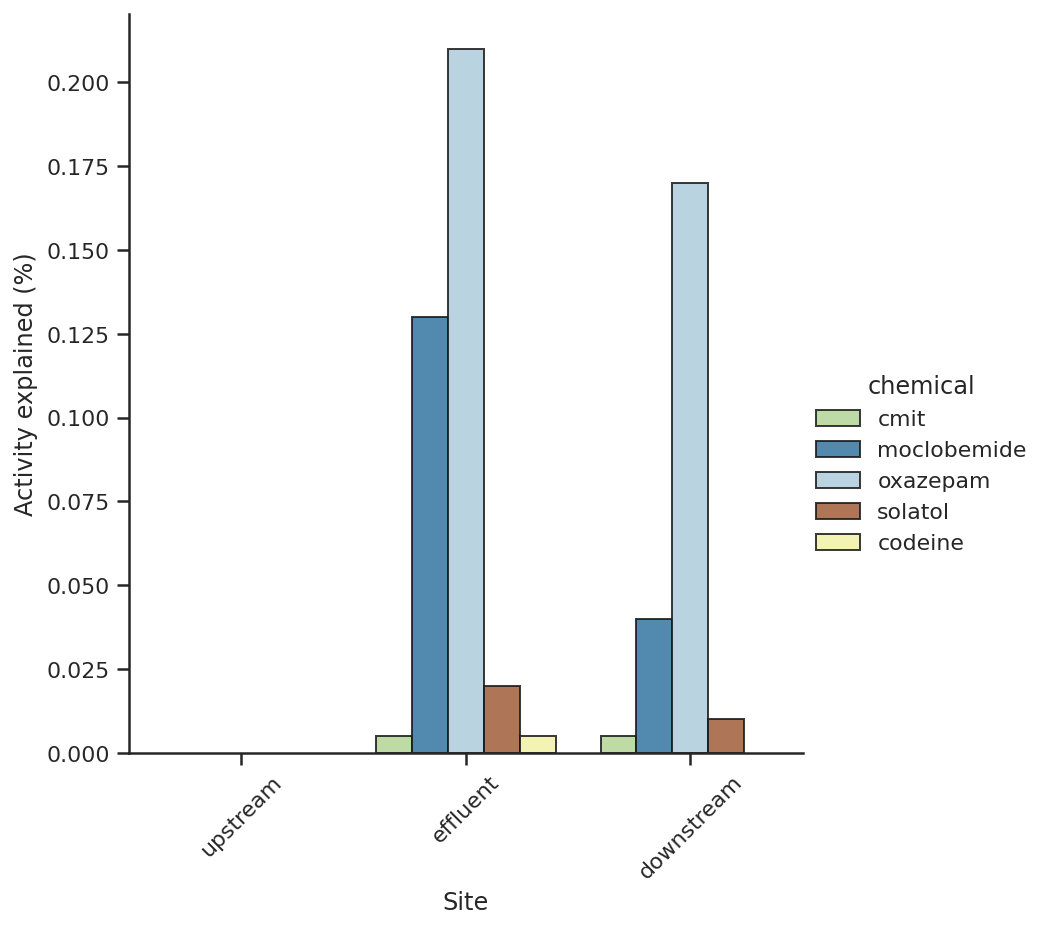

In [79]:
sns.set_style("ticks")
palette_1 = {"cmit":"#b2df8a",
           "moclobemide":"#1f78b4", 
           "oxazepam":"#a6cee3",
          "solatol":"#b15928",
          "codeine":"#ffff99"}
order = ["upstream", "effluent", "downstream"]
df_sol_av_AR_filt = df_sol_av_AR[df_sol_av_AR.activity > 0.001]
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(7, 5))
plt.rcParams["patch.force_edgecolor"] = True
g = sns.catplot(
    data=df_sol_av_AR_filt, kind="bar", order = order,
    x="site", y="activity", hue="chemical", 
    palette=palette_1, alpha=.85, height=6, edgecolor="k")
plt.xticks(rotation=45)
g.set(xlabel='Site', ylabel='Activity explained (%)')
plt.savefig('../plots/solutions/stacked_bars_ar.svg', bbox_inches = 'tight', dpi=300)

<Figure size 504x360 with 0 Axes>

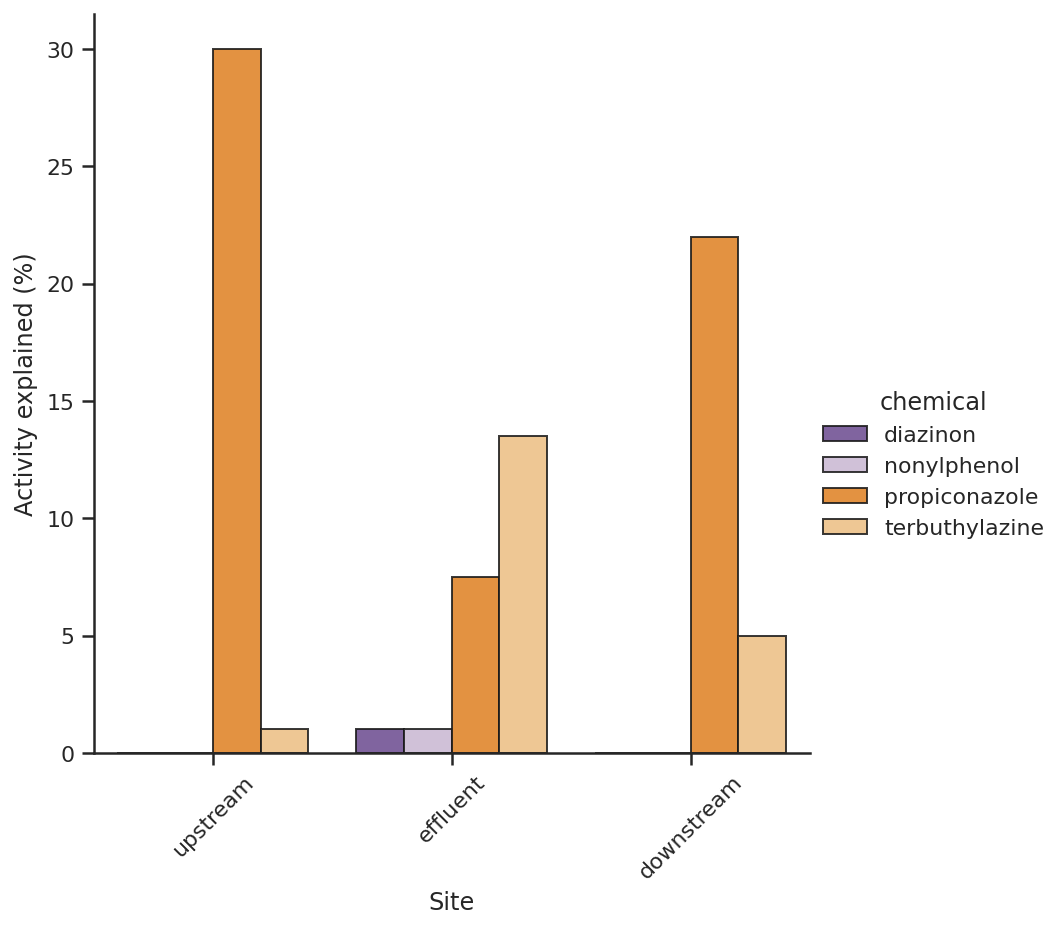

In [80]:
palette_2 = {"diazinon":"#6a3d9a",
           "nonylphenol":"#cab2d6", 
           "propiconazole":"#ff7f00",
          "terbuthylazine":"#fdbf6f"}
sns.set_style("ticks")
#df_sol_av_AhR_filt = df_sol_av_AhR[df_sol_av_AhR.activity > 0.01]
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(7, 5))
plt.rcParams["patch.force_edgecolor"] = True
g = sns.catplot(
    data=df_sol_av_AhR, kind="bar",order = order,
    x="site", y="activity", hue="chemical", 
    palette=palette_2, alpha=.85, height=6, edgecolor="k")
plt.xticks(rotation=45)
g.set(xlabel='Site', ylabel='Activity explained (%)')
plt.savefig('../plots/solutions/stacked_bars_ahr.svg', bbox_inches = 'tight', dpi=300)

In [19]:
df_sol_av_AhR.head(50)

,effect,site,chemical,activity
18,AhR,downstream,diazinon,0.00
19,AhR,downstream,nonylphenol,0.00
20,AhR,downstream,propiconazole,22.00
21,AhR,downstream,terbuthylazine,5.00
22,AhR,effluent,diazinon,0.01
23,AhR,effluent,nonylphenol,0.10
24,AhR,effluent,propiconazole,8.00
25,AhR,effluent,terbuthylazine,13.00
26,AhR,upstream,diazinon,0.00
27,AhR,upstream,nonylphenol,0.00


<Figure size 504x360 with 0 Axes>

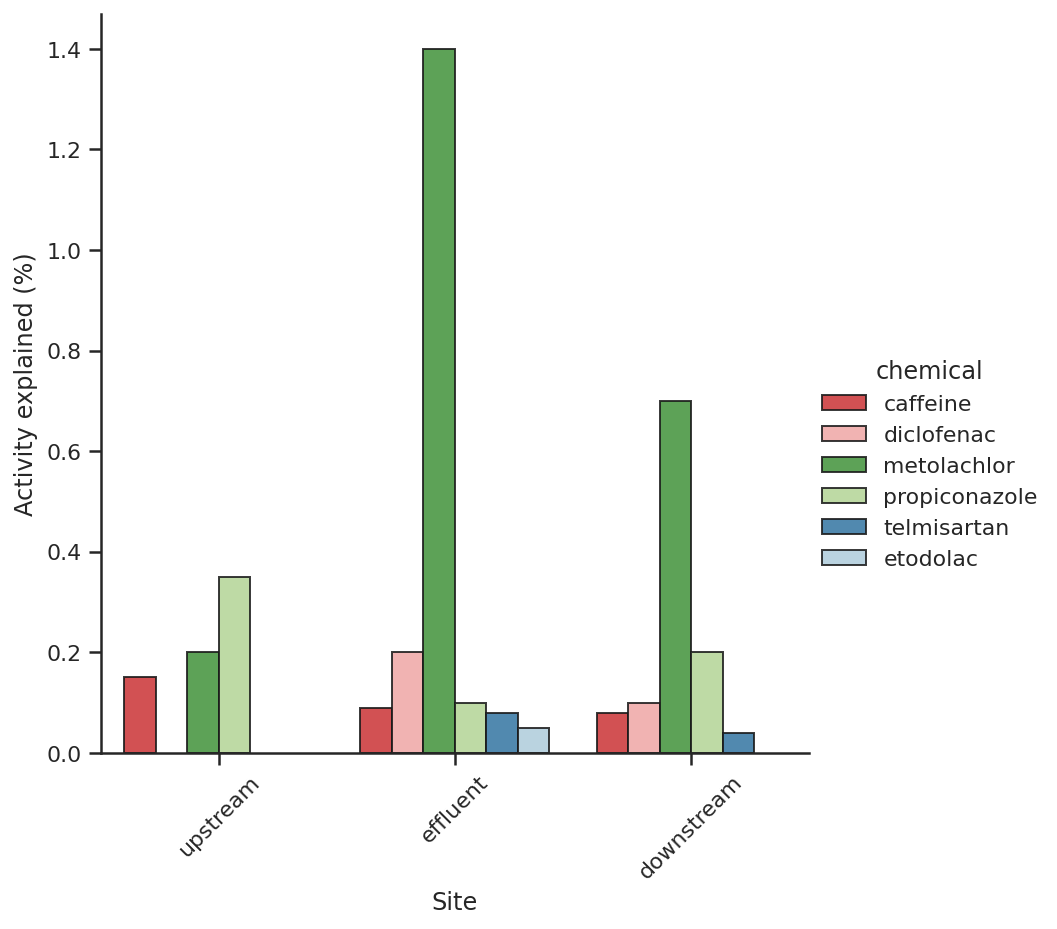

In [82]:
palette_3 = {"caffeine":"#e31a1c",
           "diclofenac":"#fb9a99", 
           "metolachlor":"#33a02c",
          "telmisartan":"#1f78b4",
            "propiconazole":"#b2df8a",
            "etodolac":"#a6cee3"}
df_sol_av_OS_filt = df_sol_av_OS[df_sol_av_OS.activity > 0.01]
sns.set_style("ticks")
%config InlineBackend.figure_format = 'retina'
plt.figure(figsize=(7, 5))
plt.rcParams["patch.force_edgecolor"] = True
g = sns.catplot(
    data=df_sol_av_OS_filt, kind="bar",
    x="site", y="activity", hue="chemical",order = order, 
    palette=palette_3, alpha=.85, height=6, edgecolor="k")
plt.xticks(rotation=45)
g.set(xlabel='Site', ylabel='Activity explained (%)')
plt.savefig('../plots/solutions/stacked_bars_OS.svg', bbox_inches = 'tight', dpi=300)